# Importing the relevant subgroups

In [148]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
from country_codes import eurostat_dictionary
import eurostat
import matplotlib.pyplot as plt


from warnings import filterwarnings
filterwarnings('ignore')
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

EU_countries = ['Belgium', 'Bulgaria', 'Czechia', 'Denmark',
'Germany (until 1990 former territory of the FRG)', 'Germany','Estonia',
'Ireland', 'Greece', 'Spain', 'France', 'Croatia', 'Italy',
'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta',
'Netherlands', 'Austria', 'Poland', 'Portugal', 'Romania',
'Slovenia', 'Slovakia', 'Finland', 'Sweden', 'United Kingdom',
'Iceland', 'Liechtenstein', 'Norway', 'Switzerland',
'Bosnia and Herzegovina']

COUNTRY = "Netherlands"

# Percentage of youth at home


In [149]:
def youth_at_home(COUNTRY, SEX = None, AGE = None):
    df_n = eurostat.get_data_df('ilc_lvps08') # YOUNG PEOPLE LIVING AT HOME
    df_n.rename({'geo\TIME_PERIOD':'geo'},inplace=True,axis=1)
    df_n.drop(['unit', 'freq'],axis=1,inplace=True)
    df_n['country'] = df_n['geo'].replace(eurostat_dictionary)

    df_n.drop(['geo'],axis=1,inplace=True)

    df_n = df_n[df_n['country'] == COUNTRY]
    # df_n = df_n[df_n['sex'] == SEX]
    # df_n = df_n[df_n['age'] == AGE]
    # df_n.drop(['2003', '2004'],axis=1, inplace=True) # 'sex', 'age', 'country', 

    df_n.set_index(['sex', 'age', 'country'], inplace=True)
    return df_n

df = youth_at_home('Netherlands', SEX = None, AGE = None)
df

# make a multi-index containing the country, sex, and age category. 

,,,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
sex,age,country,,,,,,,,,,,,,,,,,,,,
F,Y16-19,Netherlands,NaN,NaN,95.7,97.5,97.7,96.8,95.0,96.1,98.8,97.6,NaN,97.3,96.6,96.4,95.6,96.1,96.6,98.1,96.6,97.4
M,Y16-19,Netherlands,NaN,NaN,99.2,98.3,97.4,97.8,98.3,96.1,96.7,97.6,NaN,98.7,98.2,97.7,98.4,98.6,97.4,98.6,96.8,95.4
T,Y16-19,Netherlands,NaN,NaN,97.5,97.9,97.6,97.3,96.7,96.1,97.7,97.6,NaN,98.0,97.4,97.0,97.0,97.4,97.0,98.4,96.7,96.4
F,Y16-24,Netherlands,NaN,NaN,66.6,67.4,68.9,69.1,70.5,68.5,68.8,68.7,NaN,72.8,69.7,72.6,72.6,71.0,71.6,73.9,71.1,72.3
M,Y16-24,Netherlands,NaN,NaN,83.1,81.8,82.4,80.6,81.7,81.1,80.3,82.4,NaN,81.9,84.1,80.4,79.0,83.2,81.2,83.3,83.1,80.3
T,Y16-24,Netherlands,NaN,NaN,75.0,74.7,75.8,75.0,76.2,74.9,74.7,75.6,NaN,77.4,77.0,76.5,75.9,77.1,76.5,78.7,77.2,76.4
F,Y16-29,Netherlands,NaN,NaN,44.6,44.8,45.7,45.3,46.0,45.8,46.4,45.9,NaN,49.4,47.3,49.3,49.5,48.0,49.0,50.4,49.1,48.6
M,Y16-29,Netherlands,NaN,NaN,59.9,59.8,59.7,60.3,58.4,59.8,59.0,61.1,NaN,58.9,60.9,59.1,58.3,59.6,57.8,59.5,60.7,59.7
T,Y16-29,Netherlands,NaN,NaN,52.3,52.4,52.8,52.8,52.3,52.9,52.8,53.5,NaN,54.2,54.2,54.3,54.0,53.9,53.5,55.0,55.0,54.2


# Importing revelant variables
Naast de krapte op de woningmarkt en de hoge huren zijn voor studerende jongeren ook studieschulden een belangrijke reden om thuis te blijven wonen, merkt Ellen Donkers. 'Om minder schuld op te bouwen kiezen sommige jongeren ervoor om bij hun ouders te blijven wonen. Dat verklaart ook dat steeds meer jongeren pas het huis uit gaan als ze een stabiel inkomen uit werk hebben.'

Bron: CBS

### Student Loans

In [150]:
# import revelant variables from eurostat database

def download_oecd_data(data_code): # 'nama_10_pc'
    df_n = eurostat.get_data_df(data_code)
    df_n.rename({'geo\TIME_PERIOD':'geo'},inplace=True,axis=1)
    df_n['country'] = df_n['geo'].replace(eurostat_dictionary)
    # drop columns that contain all nan values
    # Dropping columns with all NaN values
    df_n.dropna(axis=1, how='all', inplace=True)
    df_n = pd.melt(df_n,id_vars=['country','unit'],
                        value_vars= df_n.columns[4:-1],
                        var_name='year',
                        value_name='gdp')

    # merged_df = df.merge(df_n, on=['country', 'year'], how='left') 
    return df_n



# Importing the GDP per capita

In [151]:

df_n = download_oecd_data('nama_10_pc')
df_n

,country,unit,year,gdp
0,Albania,CLV10_EUR_HAB,1975,NaN
1,Austria,CLV10_EUR_HAB,1975,NaN
2,Belgium,CLV10_EUR_HAB,1975,NaN
3,Bulgaria,CLV10_EUR_HAB,1975,NaN
4,Switzerland,CLV10_EUR_HAB,1975,NaN
...,...,...,...,...
166603,Sweden,PC_EU27_2020_HAB_MPPS_CP,2022,112.2
166604,Slovenia,PC_EU27_2020_HAB_MPPS_CP,2022,89.5
166605,Slovakia,PC_EU27_2020_HAB_MPPS_CP,2022,74.2
166606,Turkey,PC_EU27_2020_HAB_MPPS_CP,2022,67.5


# Unemployment rates by sex, age and citizenship (%)

In [189]:
df_n = eurostat.get_data_df('lfsa_urgan') 
df_n.rename({'geo\TIME_PERIOD':'geo'},inplace=True,axis=1)

df_n['country'] = df_n['geo'].replace(eurostat_dictionary)
df_n = df_n[df_n['country'] == COUNTRY]
df_n = df_n[df_n['citizen'] =='NAT']
print(df_n['age'].unique())

df_n.drop(['geo', 'freq', 'unit', 'citizen'],axis=1,inplace=True)
ages = ['Y15-19', 'Y15-24', 'Y15-29', 'Y15-39', 'Y20-24', 'Y20-29', 'Y25-29', 'Y30-34' ]
# keep only these ages


df_n.set_index(['sex', 'age', 'country'], inplace=True)
df_n= df_n[df_n.index.get_level_values('age').isin(ages)]
df_n= df_n[['2010', '2020']]


df_n_unemployment_rate_PC = df_n
df_n_unemployment_rate_PC

['Y15-19' 'Y15-24' 'Y15-29' 'Y15-39' 'Y15-59' 'Y15-64' 'Y15-74' 'Y20-24'
 'Y20-29' 'Y20-64' 'Y25-29' 'Y25-49' 'Y25-54' 'Y25-59' 'Y25-64' 'Y25-74'
 'Y30-34' 'Y35-39' 'Y40-44' 'Y40-59' 'Y40-64' 'Y45-49' 'Y50-54' 'Y50-59'
 'Y50-64' 'Y50-74' 'Y55-59' 'Y55-64' 'Y60-64' 'Y65-69' 'Y65-74' 'Y70-74']


2010  2020
sex age    country                
F   Y15-19 Netherlands  12.7  10.3
    Y15-24 Netherlands   9.9   8.6
    Y15-29 Netherlands   8.0   6.5
    Y15-39 Netherlands   6.2   4.9
    Y20-24 Netherlands   7.7   7.2
    Y20-29 Netherlands   6.2   5.0
    Y25-29 Netherlands   4.8   3.2
    Y30-34 Netherlands   3.9   2.8
M   Y15-19 Netherlands  13.5  10.8
    Y15-24 Netherlands  11.6   8.9
    Y15-29 Netherlands   8.5   7.0
    Y15-39 Netherlands   5.7   5.1
    Y20-24 Netherlands  10.2   7.3
    Y20-29 Netherlands   6.7   5.6
    Y25-29 Netherlands   3.5   4.2
    Y30-34 Netherlands   2.6   2.6
T   Y15-19 Netherlands  13.1  10.5
    Y15-24 Netherlands  10.8   8.7
    Y15-29 Netherlands   8.2   6.7
    Y15-39 Netherlands   5.9   5.0
    Y20-24 Netherlands   8.9   7.3
    Y20-29 Netherlands   6.4   5.3
    Y25-29 Netherlands   4.1   3.7
    Y30-34 Netherlands   3.3   2.7

# Long-term Youth Unemployment 

In [153]:

def long_term_youth_unemployment(COUNTRY, SEX = None):
    df_n = eurostat.get_data_df('yth_empl_130') # Long-term youth unemployment
    df_n.rename({'geo\TIME_PERIOD':'geo'},inplace=True,axis=1)
    df_n.drop(['unit', 'freq'],axis=1,inplace=True)
    df_n['country'] = df_n['geo'].replace(eurostat_dictionary)
    df_n.drop(['geo'],axis=1,inplace=True)


    df_n = df_n[df_n['country'] == COUNTRY]
    # df_n = df_n[df_n['sex'] == SEX]

    df_n.set_index(['sex', 'age', 'country'], inplace=True)

    return df_n

df_n = long_term_youth_unemployment('Netherlands')

df_n= df_n[['2010', '2020']]
df_n_LT_unemployment = df_n
df_n

,,,2010,2020
sex,age,country,,
F,Y15-29,Netherlands,0.9,0.6
M,Y15-29,Netherlands,1.2,0.9
T,Y15-29,Netherlands,1.1,0.7


# Mobile students from abroad enrolled by education level, sex and country of origin

In [201]:
def mobile_students_from_abroad(COUNTRY):
    df_n = eurostat.get_data_df('educ_uoe_mobs02')
    df_n.rename({'geo\TIME_PERIOD':'geo'},inplace=True,axis=1)
    # df_n.drop(['unit', 'freq'],axis=1,inplace=True)
    df_n['country'] = df_n['geo'].replace(eurostat_dictionary)
    df_n.drop(['geo'],axis=1,inplace=True)

    df_n = df_n[df_n['country'] == COUNTRY]
   
    # df_n = df_n[df_n['isced11'] == 'ED6' or  df_n['isced11'] == 'ED7']
    # df_n = df_n[(df_n['isced11'] == 'ED6') | (df_n['isced11'] == 'ED7')]

    df_n.set_index(['sex', 'country', 'partner', 'isced11'], inplace=True)
    return df_n

df_n = mobile_students_from_abroad('Netherlands')

# df_n['unit'].unique()


In [155]:

 def students_from_abroad_by_level_and_field(COUNTRY):
    df_n = eurostat.get_data_df('educ_momo_fld')
    df_n.rename({'geo\TIME_PERIOD':'geo'},inplace=True,axis=1)
    # df_n.drop(['unit', 'freq'],axis=1,inplace=True)
    df_n['country'] = df_n['geo'].replace(eurostat_dictionary)
    df_n.drop(['geo'],axis=1,inplace=True)

    # Inward mobile students as percentage of student population in the host country (%)

    df_n = df_n[df_n['country'] == COUNTRY]
    df_n = df_n[df_n['field'] == 'TOTAL']
    df_n = df_n[df_n['indic_ed'] == 'MS01_2P']
    
    return df_n

df_n = students_from_abroad_by_level_and_field('Netherlands')

print("Inward mobile students as percentage of student population in the host country (%)")
df_n


Inward mobile students as percentage of student population in the host country (%)


,freq,isced97,field,indic_ed,2008,2009,2010,2011,2012,country
1653,A,ED5,TOTAL,MS01_2P,5.05,3.88,4.35,4.47,NaN,Netherlands
3317,A,ED5A,TOTAL,MS01_2P,5.05,3.88,4.36,4.57,6.87,Netherlands
4772,A,ED5B,TOTAL,MS01_2P,NaN,NaN,0.34,0.06,0.11,Netherlands
6435,A,ED5_6,TOTAL,MS01_2P,4.99,3.83,4.30,4.92,7.25,Netherlands
7967,A,ED6,TOTAL,MS01_2P,NaN,NaN,NaN,36.06,39.28,Netherlands


# Students enrolled in tertiary education by education level, programme orientation, sex and age

In [156]:

df_n = eurostat.get_data_df('educ_uoe_enrt02')
df_n.rename({'geo\TIME_PERIOD':'geo'},inplace=True,axis=1)
df_n.drop(['unit', 'freq'],axis=1,inplace=True)
df_n['country'] = df_n['geo'].replace(eurostat_dictionary)
df_n.drop(['geo'],axis=1,inplace=True)


df_n = df_n[df_n['country'] == COUNTRY]
df_n = df_n[df_n['isced11'] == 'ED5-8']
df_n = df_n[df_n['age'] == 'TOTAL']

df_n.set_index(['sex', 'age', 'country'], inplace=True)
df_n

,,,isced11,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
sex,age,country,,,,,,,,,,,
F,TOTAL,Netherlands,ED5-8,NaN,347666.0,360540.0,440744.0,434637.0,457757.0,463184.0,476034.0,493008.0,523188.0
M,TOTAL,Netherlands,ED5-8,NaN,327086.0,341643.0,401857.0,402309.0,417698.0,426322.0,437116.0,444413.0,464376.0
T,TOTAL,Netherlands,ED5-8,NaN,674752.0,702183.0,842601.0,836946.0,875455.0,889506.0,913150.0,937421.0,987564.0


# Share of young adults aged 18-34 living with their parents by self-defined current economic status - EU-SILC survey

In [157]:
# Employed persons working full-time
# [EMP_FT]
# Employed persons working part-time
# [EMP_PT]
# Unemployed persons
# [UNE]
# Students
# [EDUC]
# Other persons outside the labour force (former name: inactive persons)
# [INAC_OTH]

# Share of young adults aged 18-34 living with their parents by self-defined current economic status - EU-SILC survey (

df_n = eurostat.get_data_df('ilc_lvps09')
df_n.rename({'geo\TIME_PERIOD':'geo'},inplace=True,axis=1)
df_n.drop(['unit', 'freq'],axis=1,inplace=True)
df_n['country'] = df_n['geo'].replace(eurostat_dictionary)
df_n.drop(['geo'],axis=1,inplace=True)

df_n = df_n[df_n['country'] == COUNTRY]
# df_n = df_n[df_n['sex'] == SEX]
# df_n.set_index(['sex', 'age', 'country'], inplace=True)
df = df_n[['country', 'age','wstatus', '2010']]
df_outcome_2010 = df
df = df_n[['country', 'age','wstatus', '2020']]
df_outcome_2020 = df
df_outcome_2020 

,country,age,wstatus,2020
33,Netherlands,Y18-24,EDUC,61.8
78,Netherlands,Y18-34,EDUC,53.7
123,Netherlands,Y25-34,EDUC,14.1
168,Netherlands,Y18-24,EMP_FT,15.5
213,Netherlands,Y18-34,EMP_FT,19.7
258,Netherlands,Y25-34,EMP_FT,40.6
303,Netherlands,Y18-24,EMP_PT,17.0
348,Netherlands,Y18-34,EMP_PT,19.9
393,Netherlands,Y25-34,EMP_PT,34.1
438,Netherlands,Y18-24,INAC_OTH,2.9


# yth_demo_030: Estimated avrage age of young people leaving the parental household by sex

In [158]:
df_n = eurostat.get_data_df('yth_demo_030')
df_n.rename({'geo\TIME_PERIOD':'geo'},inplace=True,axis=1)
df_n.drop(['unit', 'freq'],axis=1,inplace=True)
df_n['country'] = df_n['geo'].replace(eurostat_dictionary)
df_n.drop(['geo'],axis=1,inplace=True)

df_n = df_n[df_n['country'] == COUNTRY]
df_n

,sex,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,country
24,F,21.9,22.2,22.4,22.4,22.3,22.1,22.2,22.3,22.3,...,22.8,22.9,22.8,22.9,23.0,23.0,23.6,22.6,22.4,Netherlands
59,M,24.1,24.5,24.6,24.6,24.6,24.4,24.5,24.4,24.4,...,24.5,24.5,24.5,24.3,24.4,24.4,24.9,23.8,23.5,Netherlands
94,T,23.1,23.4,23.5,23.5,23.5,23.3,23.4,23.4,23.3,...,23.6,23.7,23.7,23.6,23.7,23.7,24.3,23.2,23.0,Netherlands


# Young immigrants by sex, age and country of birth (proxy for incoming international students?)

In [159]:
df_n = eurostat.get_data_df('yth_demo_070')
df_n.rename({'geo\TIME_PERIOD':'geo'},inplace=True,axis=1)

df_n['country'] = df_n['geo'].replace(eurostat_dictionary)
df_n.drop(['geo'],axis=1,inplace=True)
df_n.drop(['agedef'],axis=1,inplace=True)
df_n = df_n[df_n['unit'] == 'PC']
df_n = df_n[df_n['sex'] == 'T']
df_n = df_n[df_n['country'] == COUNTRY]
df_n
# df_n.sum(axis=0)

,freq,c_birth,unit,sex,age,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,country
120041,A,AD,PC,T,Y15-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Netherlands
120062,A,AD,PC,T,Y15-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Netherlands
120083,A,AD,PC,T,Y20-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Netherlands
120104,A,AD,PC,T,Y25-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Netherlands
120545,A,AE,PC,T,Y15-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262616,A,ZM,PC,T,Y25-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Netherlands
263057,A,ZW,PC,T,Y15-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Netherlands
263078,A,ZW,PC,T,Y15-29,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.0,Netherlands
263099,A,ZW,PC,T,Y20-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Netherlands


In [160]:
# df_n = eurostat.get_data_df('ilc_lvho07a')
# df_n.rename({'geo\TIME_PERIOD':'geo'},inplace=True,axis=1)

# df_n['country'] = df_n['geo'].replace(eurostat_dictionary)
# df_n.drop(['geo'],axis=1,inplace=True)
# # df_n.drop(['agedef'],axis=1,inplace=True)
# # df_n = df_n[df_n['unit'] == 'PC']
# # df_n = df_n[df_n['sex'] == 'T']
# df_n = df_n[df_n['country'] == COUNTRY]
# df_n
# # df_n.sum(axis=0)

# Housing cost overburden rate by degree of urbanisation - EU-SILC survey

In [161]:
df_n = eurostat.get_data_df('ilc_lvho07d')
df_n.rename({'geo\TIME_PERIOD':'geo'},inplace=True,axis=1)

df_n['country'] = df_n['geo'].replace(eurostat_dictionary)
df_n.drop(['geo'],axis=1,inplace=True)
# df_n.drop(['agedef'],axis=1,inplace=True)
# df_n = df_n[df_n['unit'] == 'PC']
# df_n = df_n[df_n['sex'] == 'T']
df_n = df_n[df_n['deg_urb'] == 'DEG1']
df_n = df_n[df_n['country'] == COUNTRY]
df_n

,freq,unit,deg_urb,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,country
32,A,PC,DEG1,NaN,NaN,21.3,20.7,19.3,14.5,14.2,...,17.7,18.4,13.5,12.2,12.1,12.9,10.7,10.5,12.1,Netherlands


# Merging the dataframes

In [190]:
df1 = df_n_unemployment_rate_PC
df2 = df_outcome_2020
df1.reset_index(drop=False, inplace=True)
df2.reset_index(drop=False, inplace=True)


In [191]:
df_n_unemployment_rate_PC

,sex,age,country,2010,2020
0,F,Y15-19,Netherlands,12.7,10.3
1,F,Y15-24,Netherlands,9.9,8.6
2,F,Y15-29,Netherlands,8.0,6.5
3,F,Y15-39,Netherlands,6.2,4.9
4,F,Y20-24,Netherlands,7.7,7.2
5,F,Y20-29,Netherlands,6.2,5.0
6,F,Y25-29,Netherlands,4.8,3.2
7,F,Y30-34,Netherlands,3.9,2.8
8,M,Y15-19,Netherlands,13.5,10.8
9,M,Y15-24,Netherlands,11.6,8.9


In [193]:
df1 = df_n_unemployment_rate_PC
df1 = df1[df1['age'] == 'Y30-34']
df1 = df1[df1['sex'] == 'T']
df1

,sex,age,country,2010,2020
23,T,Y30-34,Netherlands,3.3,2.7


In [192]:
df1 = df_n_unemployment_rate_PC
df1 = df1[df1['age'] == 'Y25-29']
df1 = df1[df1['sex'] == 'T']
df1

,sex,age,country,2010,2020
22,T,Y25-29,Netherlands,4.1,3.7


In [197]:
# averaging over the two age groups to obtain Y25-34 (2010)
(4.1 + 3.3)/2

In [198]:
# averaging over the two age groups to obtain Y25-34 (2020)
(2.7 + 3.7)/2

In [183]:
df1 = df_n_unemployment_rate_PC
df1 = df1[df1['age'] == 'Y15-39']
df1 = df1[df1['sex'] == 'T']
df1

,sex,age,country,2010,2020
17,T,Y15-39,Netherlands,5.9,5.0


In [184]:
df1 = df_n_unemployment_rate_PC
df1 = df1[df1['age'] == 'Y15-24']
df1 = df1[df1['sex'] == 'T']
df1

,sex,age,country,2010,2020
15,T,Y15-24,Netherlands,10.8,8.7


In [200]:
# Adding a new column based on conditions
df_outcome_2010['unemployment_rate_age_group'] = None  # Initialize column with None values

# Setting values based on conditions
df_outcome_2010.loc[df_outcome_2010['age'] == 'Y18-34', 'unemployment_rate_age_group'] = 5.9
df_outcome_2010.loc[df_outcome_2010['age'] == 'Y18-24', 'unemployment_rate_age_group'] = 10.8
df_outcome_2010.loc[df_outcome_2010['age'] == 'Y25-34', 'unemployment_rate_age_group'] = 3.7
df_outcome_2010

,country,age,wstatus,2010,unemployment_rate_age_group
33,Netherlands,Y18-24,EDUC,54.6,10.8
78,Netherlands,Y18-34,EDUC,49.0,5.9
123,Netherlands,Y25-34,EDUC,13.3,3.7
168,Netherlands,Y18-24,EMP_FT,23.7,10.8
213,Netherlands,Y18-34,EMP_FT,28.5,5.9
258,Netherlands,Y25-34,EMP_FT,59.3,3.7
303,Netherlands,Y18-24,EMP_PT,14.5,10.8
348,Netherlands,Y18-34,EMP_PT,14.6,5.9
393,Netherlands,Y25-34,EMP_PT,15.4,3.7
438,Netherlands,Y18-24,INAC_OTH,2.6,10.8


In [199]:
# Adding a new column based on conditions
df_outcome_2020['unemployment_rate_age_group'] = None  # Initialize column with None values

# Setting values based on conditions 
df_outcome_2020.loc[df_outcome_2020['age'] == 'Y18-34', 'unemployment_rate_age_group'] = 5.0 # only for 15-39 -> 18-34
df_outcome_2020.loc[df_outcome_2020['age'] == 'Y18-24', 'unemployment_rate_age_group'] = 8.7 # Y18-24 (based on the data Y15-24)
df_outcome_2020.loc[df_outcome_2020['age'] == 'Y25-34', 'unemployment_rate_age_group'] = 3.2
df_outcome_2020

,level_0,index,country,age,wstatus,2020,unemployment_rate_age_group
0,0,33,Netherlands,Y18-24,EDUC,61.8,8.7
1,1,78,Netherlands,Y18-34,EDUC,53.7,5.0
2,2,123,Netherlands,Y25-34,EDUC,14.1,3.2
3,3,168,Netherlands,Y18-24,EMP_FT,15.5,8.7
4,4,213,Netherlands,Y18-34,EMP_FT,19.7,5.0
5,5,258,Netherlands,Y25-34,EMP_FT,40.6,3.2
6,6,303,Netherlands,Y18-24,EMP_PT,17.0,8.7
7,7,348,Netherlands,Y18-34,EMP_PT,19.9,5.0
8,8,393,Netherlands,Y25-34,EMP_PT,34.1,3.2
9,9,438,Netherlands,Y18-24,INAC_OTH,2.9,8.7


In [169]:
# With graph
model=CausalModel(
        data =df_outcome ,
        treatment='wstatus',
        outcome= '2020',
        graph= # TO DO )
model.view_model()

SyntaxError: incomplete input (2737831634.py, line 7)

In [ ]:
import numpy as np

from dowhy import CausalModel
import dowhy.datasets 

data = dowhy.datasets.linear_dataset(beta=10,
        num_common_causes=5,
        num_instruments = 2,
        num_effect_modifiers=1,
        num_samples=5000, 
        treatment_is_binary=True,
        stddev_treatment_noise=10,
        num_discrete_common_causes=1)
df = data["df"]

df

,X0,Z0,Z1,W0,W1,W2,W3,W4,v0,y
0,-1.215923,1.0,0.202938,-1.189681,-1.973518,1.209169,1.012530,3,True,10.639731
1,0.080369,1.0,0.529350,-0.761291,0.406225,-0.891106,0.622135,2,True,13.295994
2,-1.237285,1.0,0.759618,0.714957,-1.299374,-1.309626,1.643670,1,True,13.386826
3,-0.038475,1.0,0.364853,0.567627,-1.260972,-0.660000,-0.641913,0,True,6.241865
4,-1.002220,1.0,0.483828,-0.756537,-2.464001,0.885796,1.795528,2,True,12.767254
...,...,...,...,...,...,...,...,...,...,...
4995,-0.745357,1.0,0.573696,0.030915,-0.729109,0.360907,0.648698,3,True,17.787956
4996,1.346221,1.0,0.676347,-0.475979,-0.352651,1.384297,-0.625623,1,True,15.410136
4997,-0.479271,1.0,0.614339,-0.207321,-0.350409,0.685745,1.514847,0,True,14.464847
4998,-0.377023,1.0,0.990514,1.660587,-0.910378,0.278292,1.536710,2,True,28.454895


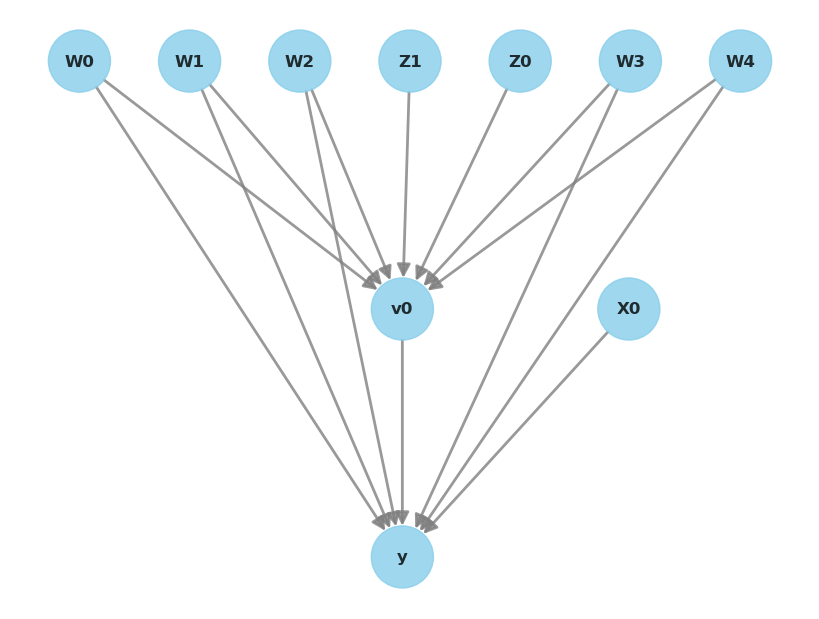

In [ ]:
# With graph
model=CausalModel(
        data = df,
        treatment=data["treatment_name"],
        outcome=data["outcome_name"],
        graph=data["gml_graph"]
        )
model.view_model()

In [ ]:
data["treatment_name"]

['v0']

In [ ]:
data["outcome_name"]

'y'